In [2]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

In [3]:
data= pd.read_csv("Tweets.csv")
data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.describe

<bound method DataFrame.describe of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
5      570300767074181121          negative                        1.0000   
6      570300616901320704          positive                        0.6745   
7      570300248553349120           neutral                        0.6340   
8      570299953286942721          positive                        0.6559   
9      570295459631263746          positive                        1.0000   
10     570294189143031808           neutral                        0.6769   
11     570289724453216256          posit

In [5]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [6]:
data.shape

(14640, 15)

In [7]:
#tweet counts per airline

data.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

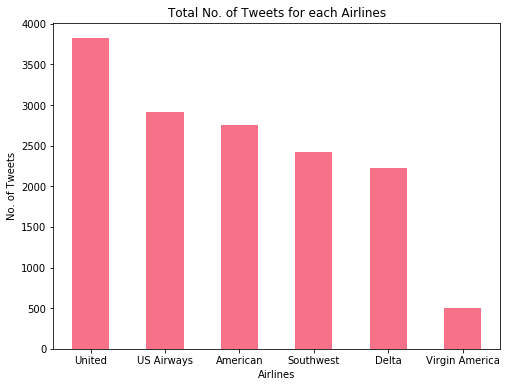

In [10]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("husl", 10) 
pd.Series(data["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [11]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

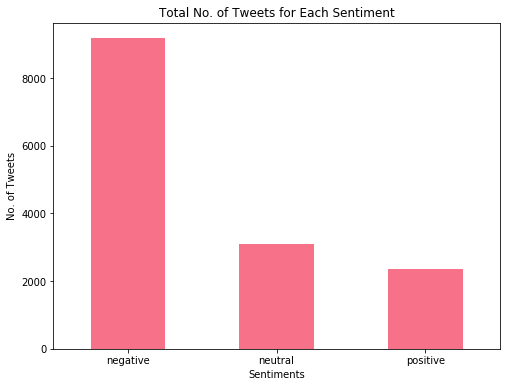

In [14]:
colors=sns.color_palette('husl',10)

pd.Series(data["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)



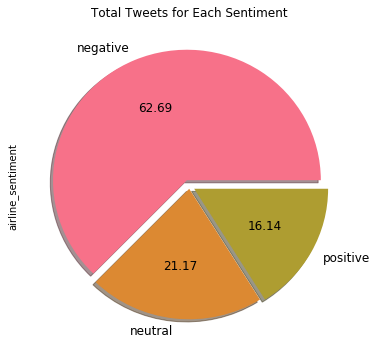

In [15]:
colors=sns.color_palette("husl", 10)
pd.Series(data["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")


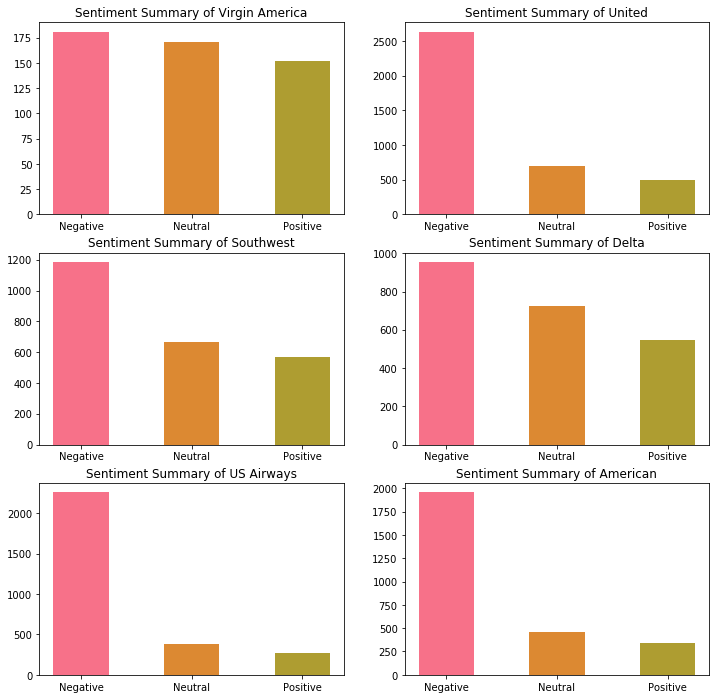

In [16]:
def plot_sub_sentiment(Airline):
    pdf = data[data['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = data['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [20]:
data.negativereason.value_counts().head(5)

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

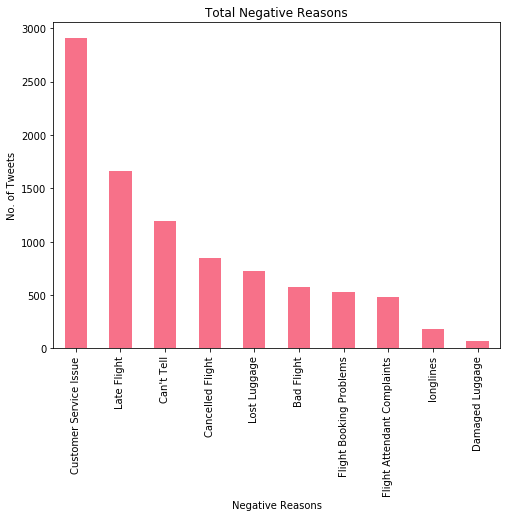

In [18]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(data["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)


Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

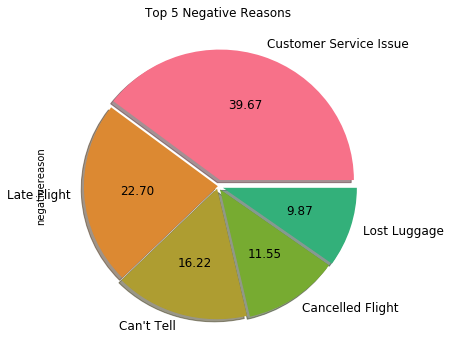

In [21]:
color=sns.color_palette("husl", 10)
pd.Series(data["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

In [23]:
sentiment=pd.crosstab(data.airline, data.airline_sentiment)
sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [24]:
percent=sentiment.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


In [25]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data["date_created"] = data["tweet_created"].dt.date


In [26]:
df = data.groupby(['date_created','airline'])
df = df.airline_sentiment.value_counts()
df.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-17   Delta               51.0     63.0      47.0
             Southwest          162.0     69.0      56.0
             US Airways         156.0     22.0      33.0
             United             173.0     50.0      29.0
             Virgin America      10.0     16.0      16.0
2015-02-18   Delta              127.0     84.0      78.0
             Southwest          143.0     96.0      90.0
             US Airways         259.0     29.0      44.0
             United             281.0     74.0      53.0
             Virgin America      17.0     21.0      20.0
2015-02-19   American             1.0      NaN       1.0
             Delta              127.0     68.0      74.0
             Southwest          103.0    102.0      86.0
             US Airways         189.0     58.0      34.0
             United             224.0     97.0      71.0
             Virgin America      22.0     21.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta              108.0     97.0      78.0
             Southwest          139.0     98.0      73.0
             US Airways         234.0     50.0      34.0
             United             347.0    104.0      78.0
             Virgin America      20.0     34.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               91.0     78.0      55.0
             Southwest          219.0     77.0      64.0
             US Airways         224.0     31.0      26.0
             United             333.0     72.0      72.0
             Virgin America      33.0     14.0      28.0
2015-02-22   American           316.0     46.0      42.0
             Delta              221.0     82.0      83.0
             Southwest          143.0     52.0      53.0
             US Airways         536.0     58.0      28.0
             United             494.0    109.0      63.0
             Virgin America      34.0     20.0      12.0
2015-02-23   American          1071.0    214.0     144.0
             Delta              160.0    181.0      83.0
             Southwest          151.0    107.0      94.0
             US Airways         431.0     76.0      46.0
             United             503.0    103.0      71.0
             Virgin America      30.0     30.0      20.0
2015-02-24   American           570.0    203.0     149.0
             Delta               70.0     70.0      46.0
             Southwest          126.0     63.0      54.0
             US Airways         234.0     57.0      24.0
             United             278.0     88.0      55.0
             Virgin America      15.0     15.0      19.0

In [28]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date_created
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 19:35:52,NaN,Eastern Time (US & Canada),2015-02-24
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 19:15:59,NaN,Pacific Time (US & Canada),2015-02-24
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 19:15:48,Lets Play,Central Time (US & Canada),2015-02-24
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 19:15:36,NaN,Pacific Time (US & Canada),2015-02-24
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 19:14:45,NaN,Pacific Time (US & Canada),2015-02-24


In [29]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [30]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 



In [31]:
data['sentiment']=data['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
data.sentiment.head()


0    1
1    1
2    1
3    0
4    0
Name: sentiment, dtype: int64

In [32]:
#Splitting the data into train and test
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))
data['Tweet_length']=data['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(data,test_size=0.2,random_state=42)


In [36]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


In [35]:
data.columns = data.columns.str.strip()

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [39]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [40]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  

Accuracy of LogisticRegression is 0.645150273224
Accuracy of KNeighborsClassifier is 0.589139344262
Accuracy of SVC is 0.645150273224
Accuracy of DecisionTreeClassifier is 0.757513661202
Accuracy of RandomForestClassifier is 0.812841530055
Accuracy of AdaBoostClassifier is 0.785519125683
Accuracy of GaussianNB is 0.572404371585


In [41]:
logreg = LogisticRegression()

logreg.fit(train_features, train['sentiment'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)